In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [3]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [21]:
img_width = 150
img_height = 150

train_data_dir = '../input/rbcclassification/RBC/training'
validation_data_dir = '../input/rbcclassification/RBC/validation'
train_samples = 200
validation_samples = 15
epochs = 90
batch_size = 12

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [22]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

In [23]:
import keras
from keras import optimizers
model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.00001),
              metrics=['accuracy'])

In [24]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [25]:
# this is the augmentation configuration we will use for testing:
# only rescaling, avoiding having same training and validation data.
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [26]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 596 images belonging to 3 classes.


In [27]:
print(train_generator.class_indices)

{'Circular': 0, 'Elongated': 1, 'other': 2}


In [28]:
imgs, labels = next(train_generator)

In [12]:
input_shape = (150,150,3)

In [29]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

12
[1. 0. 0.]


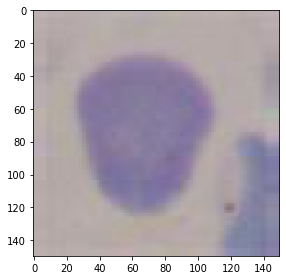

[0. 1. 0.]


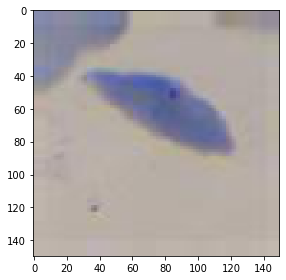

[0. 1. 0.]


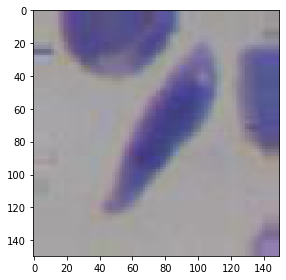

[0. 1. 0.]


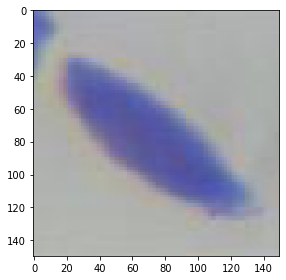

[0. 0. 1.]


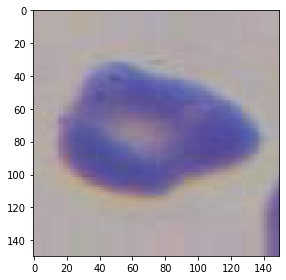

[0. 0. 1.]


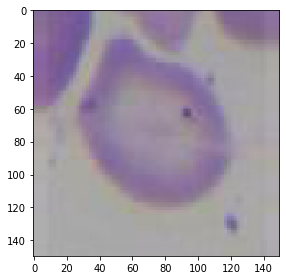

[0. 1. 0.]


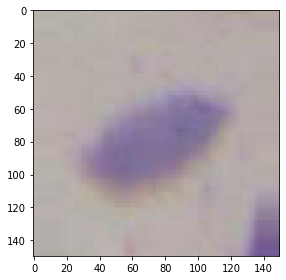

[1. 0. 0.]


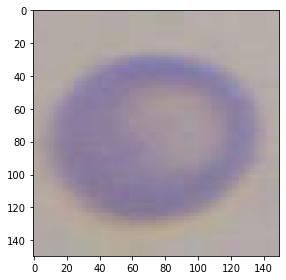

[0. 1. 0.]


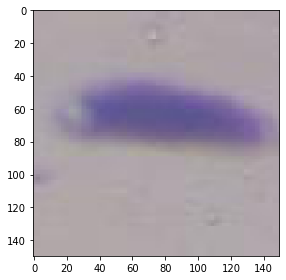

[0. 1. 0.]


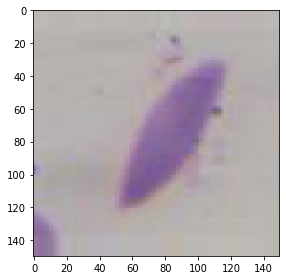

[1. 0. 0.]


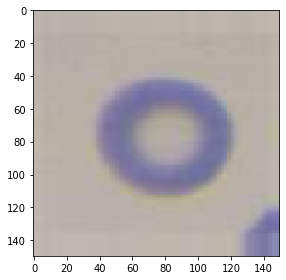

[0. 0. 1.]


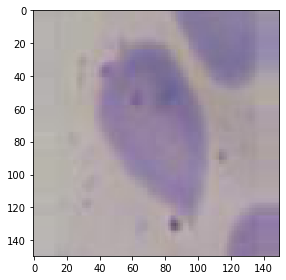

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [31]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 15 images belonging to 3 classes.


In [32]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/90
16/16 [==============================] - 4s 221ms/step - loss: 1.1187 - accuracy: 0.2636 - val_loss: 1.1003 - val_accuracy: 0.3333
Epoch 2/90
16/16 [==============================] - 3s 207ms/step - loss: 1.1080 - accuracy: 0.3023 - val_loss: 1.1001 - val_accuracy: 0.2500
Epoch 3/90
16/16 [==============================] - 4s 232ms/step - loss: 1.1106 - accuracy: 0.2906 - val_loss: 1.0999 - val_accuracy: 0.3333
Epoch 4/90
16/16 [==============================] - 3s 206ms/step - loss: 1.1067 - accuracy: 0.3070 - val_loss: 1.1030 - val_accuracy: 0.2500
Epoch 5/90
16/16 [==============================] - 3s 210ms/step - loss: 1.1027 - accuracy: 0.3506 - val_loss: 1.0961 - val_accuracy: 0.4167
Epoch 6/90
16/16 [==============================] - 3s 207ms/step - loss: 1.0972 - accuracy: 0.2911 - val_loss: 1.0963 - val_accuracy: 0.3333
Epoch 7/90
16/16 [==============================] - 4s 216ms/step - loss: 1.1039 - accuracy: 0.2582 - val_loss: 1.1002 - val_accuracy: 0.2500
Epoch 

In [33]:
y = model.save_weights('RBC_one.h5') 

In [35]:
x = history.history['val_accuracy']
best_accuracy = max(x)
best_accuracy

0.9166666865348816

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


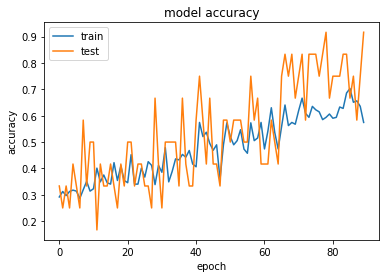

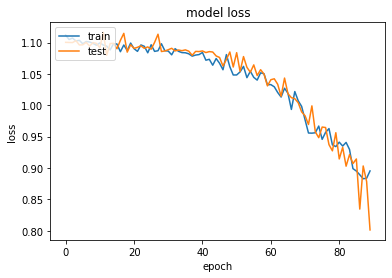

In [37]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
## Now Predict
predict_dir_path='../input/rbcclassification/RBC/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)


['o0220.jpg', 'o0224.jpg', 'e0225.jpg', 'e0223.jpg', 'c0200.jpg', 'e0227.jpg', 'o0223.jpg', 'c0198.jpg', 'e0226.jpg', 'c0201.jpg', 'o0221.jpg', 'e0224.jpg', 'c0202.jpg', 'c0199.jpg', 'o0222.jpg']


In [40]:
# predicting images
from keras.preprocessing import image
circular_counter = 0 
elongated_counter  = 0
other_counter = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0]
    
    if classes == 0:
        print(file + ": " + 'circular')
        circular_counter += 1
    elif classes == 1:
        print(file + ": " + 'elongated')
        elongated_counter += 1
    else:
        print(file + ": " + 'other')
        other_counter += 1
print("Total Circular :",circular_counter)
print("Total Elongated :",elongated_counter)
print("Total Other :",other_counter)

o0220.jpg: circular
o0224.jpg: other
e0225.jpg: elongated
e0223.jpg: elongated
c0200.jpg: circular
e0227.jpg: elongated
o0223.jpg: other
c0198.jpg: circular
e0226.jpg: elongated
c0201.jpg: elongated
o0221.jpg: other
e0224.jpg: elongated
c0202.jpg: circular
c0199.jpg: circular
o0222.jpg: other
Total Circular : 5
Total Elongated : 6
Total Other : 4
